# **AI-Assisted Cancer Detection in EU Hospitals**


**Name - Layanika Vinay Saravanan**

**Student ID - 8934459**

## **Loading Dataset and Merging Datasets -**

In [1]:
import pandas as pd

def merge_data_files():
    """
    Merge the ISIC_2020_Training_GroundTruth.csv with merged_sample.csv
    using image_name as the common key.
    """
    print("Loading datasets...")
    
    try:
        # Load the original ISIC dataset
        isic_df = pd.read_csv('ISIC_2020_Training_GroundTruth.csv')
        print(f"Loaded ISIC dataset with {len(isic_df)} rows and {len(isic_df.columns)} columns")
        
        # Load the synthetic data
        synthetic_df = pd.read_csv('merged_sample.csv')
        print(f"Loaded synthetic dataset with {len(synthetic_df)} rows and {len(synthetic_df.columns)} columns")
        
        # Check if both datasets have the image_name column
        if 'image_name' not in isic_df.columns:
            print("Error: 'image_name' column not found in ISIC_2020_Training_GroundTruth.csv")
            return
            
        if 'image_name' not in synthetic_df.columns:
            print("Error: 'image_name' column not found in merged_sample.csv")
            return
        
        # Identify columns that exist in both datasets (to avoid duplication)
        duplicate_cols = [col for col in synthetic_df.columns if col in isic_df.columns and col != 'image_name']
        if duplicate_cols:
            print(f"Note: The following columns exist in both datasets and will be taken from the ISIC dataset: {duplicate_cols}")
            # Remove duplicate columns from synthetic_df to avoid _x, _y suffixes
            synthetic_df = synthetic_df.drop(columns=duplicate_cols)
        
        # Merge the datasets on image_name
        merged_df = pd.merge(isic_df, synthetic_df, on='image_name', how='left')
        print(f"Successfully merged datasets. Result has {len(merged_df)} rows and {len(merged_df.columns)} columns")
        
        # Check for any missing values that might have been introduced during the merge
        missing_count = merged_df.isnull().sum().sum()
        if missing_count > 0:
            print(f"Warning: The merged dataset contains {missing_count} missing values")
        
        # Save the merged data
        output_filename = 'complete_cancer_detection_dataset.csv'
        merged_df.to_csv(output_filename, index=False)
        print(f"Merged dataset saved to {output_filename}")
        
        # Display the first few rows of the merged dataset
        print("\nFirst 5 rows of the merged dataset:")
        print(merged_df.head())
        
        return merged_df
        
    except Exception as e:
        print(f"Error during merge process: {str(e)}")
        return None

if __name__ == "__main__":
    merge_data_files()

Loading datasets...
Loaded ISIC dataset with 33126 rows and 8 columns
Loaded synthetic dataset with 33126 rows and 18 columns
Note: The following columns exist in both datasets and will be taken from the ISIC dataset: ['target', 'benign_malignant']
Successfully merged datasets. Result has 33126 rows and 23 columns
Merged dataset saved to complete_cancer_detection_dataset.csv

First 5 rows of the merged dataset:
     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  traditional_diagnosis_time  \
0   unknown           benign  

## **Basic EDA -**

In [6]:
import pandas as pd
import numpy as np

def perform_isic_eda(file_path='ISIC_2020_Training_GroundTruth.csv'):
    """
    Perform a basic exploratory data analysis on the ISIC 2020 dataset
    without any visualizations.
    
    Parameters:
    -----------
    file_path : str
        Path to the ISIC_2020_Training_GroundTruth.csv file
    """
    print("Loading ISIC 2020 dataset...")
    
    # Load the data
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        return
    
    # 1. Basic dataset information
    print("\n===== BASIC DATASET INFORMATION =====")
    print("\nFirst 5 rows:")
    print(df.head())
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nBasic statistics:")
    print(df.describe(include='all').T)
    
    # 2. Missing values analysis
    print("\n===== MISSING VALUES ANALYSIS =====")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percent.round(2)
    })
    
    print(missing_df)
    
    # 3. Categorical variable analysis
    print("\n===== CATEGORICAL VARIABLES ANALYSIS =====")
    
    # Sex distribution
    print("\nSex distribution:")
    sex_counts = df['sex'].value_counts(dropna=False)
    sex_percent = (sex_counts / len(df)) * 100
    
    for sex, count in sex_counts.items():
        print(f"  {sex if pd.notna(sex) else 'Missing'}: {count} ({sex_percent[sex]:.2f}%)")
    
    # Anatomical site distribution
    print("\nAnatomical site distribution:")
    site_counts = df['anatom_site_general_challenge'].value_counts(dropna=False)
    site_percent = (site_counts / len(df)) * 100
    
    for site, count in site_counts.items():
        print(f"  {site if pd.notna(site) else 'Missing'}: {count} ({site_percent[site]:.2f}%)")
    
    # Diagnosis distribution
    print("\nDiagnosis distribution:")
    diagnosis_counts = df['diagnosis'].value_counts(dropna=False)
    diagnosis_percent = (diagnosis_counts / len(df)) * 100
    
    for diagnosis, count in diagnosis_counts.items():
        print(f"  {diagnosis if pd.notna(diagnosis) else 'Missing'}: {count} ({diagnosis_percent[diagnosis]:.2f}%)")
    
    # Benign/Malignant distribution
    print("\nBenign/Malignant distribution:")
    bm_counts = df['benign_malignant'].value_counts(dropna=False)
    bm_percent = (bm_counts / len(df)) * 100
    
    for status, count in bm_counts.items():
        print(f"  {status if pd.notna(status) else 'Missing'}: {count} ({bm_percent[status]:.2f}%)")
    
    # Target distribution
    print("\nTarget distribution:")
    target_counts = df['target'].value_counts(dropna=False)
    target_percent = (target_counts / len(df)) * 100
    
    for target, count in target_counts.items():
        print(f"  {target if pd.notna(target) else 'Missing'}: {count} ({target_percent[target]:.2f}%)")
    
    # 4. Numerical variable analysis
    print("\n===== NUMERICAL VARIABLES ANALYSIS =====")
    
    # Age analysis
    print("\nAge statistics:")
    age_stats = df['age_approx'].describe()
    print(f"  Count: {age_stats['count']}")
    print(f"  Mean: {age_stats['mean']:.2f}")
    print(f"  Std: {age_stats['std']:.2f}")
    print(f"  Min: {age_stats['min']:.2f}")
    print(f"  25%: {age_stats['25%']:.2f}")
    print(f"  50% (Median): {age_stats['50%']:.2f}")
    print(f"  75%: {age_stats['75%']:.2f}")
    print(f"  Max: {age_stats['max']:.2f}")
    
    # 5. Cross-tabulation analysis
    print("\n===== CROSS-TABULATION ANALYSIS =====")
    
    # Target vs. Sex
    print("\nTarget distribution by sex:")
    sex_target = pd.crosstab(df['sex'], df['target'], margins=True, normalize='index')
    sex_target = sex_target.multiply(100).round(2)
    print(sex_target)
    
    # Target vs. Anatomical site
    print("\nTarget distribution by anatomical site:")
    site_target = pd.crosstab(df['anatom_site_general_challenge'], df['target'], margins=True, normalize='index')
    site_target = site_target.multiply(100).round(2)
    print(site_target)
    
    # Target vs. Diagnosis
    print("\nTarget distribution by diagnosis:")
    diag_target = pd.crosstab(df['diagnosis'], df['target'], margins=True, normalize='index')
    diag_target = diag_target.multiply(100).round(2)
    print(diag_target)
    
    # Benign/Malignant vs. Target (should be perfectly correlated if benign=0, malignant=1)
    print("\nBenign/Malignant vs. Target:")
    bm_target = pd.crosstab(df['benign_malignant'], df['target'], margins=True)
    print(bm_target)
    
    # 6. Age distribution analysis
    print("\n===== AGE DISTRIBUTION ANALYSIS =====")
    
    # Age groups
    age_bins = [0, 18, 30, 45, 60, 75, 100]
    age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
    
    df['age_group'] = pd.cut(df['age_approx'], bins=age_bins, labels=age_labels)
    
    # Age group distribution
    print("\nAge group distribution:")
    age_group_counts = df['age_group'].value_counts(dropna=False).sort_index()
    age_group_percent = (age_group_counts / len(df)) * 100
    
    for age_group, count in age_group_counts.items():
        print(f"  {age_group if pd.notna(age_group) else 'Missing'}: {count} ({age_group_percent[age_group]:.2f}%)")
    
    # Target by age group
    print("\nTarget distribution by age group:")
    age_target = pd.crosstab(df['age_group'], df['target'], margins=True, normalize='index')
    age_target = age_target.multiply(100).round(2)
    print(age_target)
    
    # 7. Patient analysis
    print("\n===== PATIENT ANALYSIS =====")
    
    # Number of unique patients
    unique_patients = df['patient_id'].nunique()
    print(f"\nNumber of unique patients: {unique_patients}")
    
    # Images per patient
    images_per_patient = df.groupby('patient_id').size().describe()
    print("\nImages per patient statistics:")
    print(f"  Mean: {images_per_patient['mean']:.2f}")
    print(f"  Std: {images_per_patient['std']:.2f}")
    print(f"  Min: {images_per_patient['min']:.0f}")
    print(f"  25%: {images_per_patient['25%']:.0f}")
    print(f"  50% (Median): {images_per_patient['50%']:.0f}")
    print(f"  75%: {images_per_patient['75%']:.0f}")
    print(f"  Max: {images_per_patient['max']:.0f}")
    
    # Patients with both benign and malignant lesions
    patient_has_benign = df[df['benign_malignant'] == 'benign']['patient_id'].unique()
    patient_has_malignant = df[df['benign_malignant'] == 'malignant']['patient_id'].unique()
    patients_with_both = set(patient_has_benign).intersection(set(patient_has_malignant))
    
    print(f"\nPatients with both benign and malignant lesions: {len(patients_with_both)}")
    
    # 8. Summary analysis for research hypothesis
    print("\n===== SUMMARY FOR HYPOTHESIS TESTING =====")
    print("For research hypothesis: Implementation of standardized AI-assisted diagnostic imaging systems in EU hospitals will increase cancer detection accuracy by 15% and reduce diagnostic time from 72 to 24 hours.")
    
    print("\nRelevant statistics from ISIC 2020 dataset:")
    print(f"  - Total number of images: {len(df)}")
    print(f"  - Unique patients: {unique_patients}")
    print(f"  - Benign cases: {len(df[df['benign_malignant'] == 'benign'])} ({len(df[df['benign_malignant'] == 'benign'])/len(df)*100:.2f}%)")
    print(f"  - Malignant cases: {len(df[df['benign_malignant'] == 'malignant'])} ({len(df[df['benign_malignant'] == 'malignant'])/len(df)*100:.2f}%)")
    
    # Calculate class imbalance ratio
    imbalance_ratio = len(df[df['benign_malignant'] == 'benign']) / len(df[df['benign_malignant'] == 'malignant'])
    print(f"  - Class imbalance ratio (benign:malignant): {imbalance_ratio:.2f}:1")
    
    return df

if __name__ == "__main__":
    perform_isic_eda()

Loading ISIC 2020 dataset...
Dataset loaded successfully with 33126 rows and 8 columns.

===== BASIC DATASET INFORMATION =====

First 5 rows:
     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  

Data types:
image_name                        object
patient_id                        object
sex                               object
a

## **Statistical Tests -**

In [7]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('complete_cancer_detection_dataset.csv')

# Perform paired t-test on traditional vs AI diagnostic times
t_stat, p_value = stats.ttest_rel(df['traditional_diagnosis_time'], df['ai_diagnosis_time'])

print("Paired t-test for Traditional vs AI Diagnostic Time")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.8f}")
print(f"Mean traditional time: {df['traditional_diagnosis_time'].mean():.2f} hours")
print(f"Mean AI time: {df['ai_diagnosis_time'].mean():.2f} hours")
print(f"Mean difference: {(df['traditional_diagnosis_time'] - df['ai_diagnosis_time']).mean():.2f} hours")
print(f"Percentage reduction: {((df['traditional_diagnosis_time'] - df['ai_diagnosis_time']).mean() / df['traditional_diagnosis_time'].mean() * 100):.2f}%")
print(f"Statistical significance: {'Significant' if p_value < 0.05 else 'Not significant'}")

Paired t-test for Traditional vs AI Diagnostic Time
t-statistic: 594.4919
p-value: 0.00000000
Mean traditional time: 69.05 hours
Mean AI time: 23.60 hours
Mean difference: 45.45 hours
Percentage reduction: 65.82%
Statistical significance: Significant


## **Extended EDA & Data Wrangling -**

#### **Feature Engineering -**

Diagnostic times by country:
             traditional_diagnosis_time  ai_diagnosis_time
country                                                   
Belgium                       68.967852          23.536816
Denmark                       68.683483          23.578666
Finland                       68.988745          23.576109
France                        69.045876          23.511674
Germany                       69.204838          23.601784
Italy                         69.063500          23.562401
Netherlands                   69.268936          23.571934
Poland                        69.045697          23.725584
Spain                         69.183603          23.648516
Sweden                        69.084620          23.681913


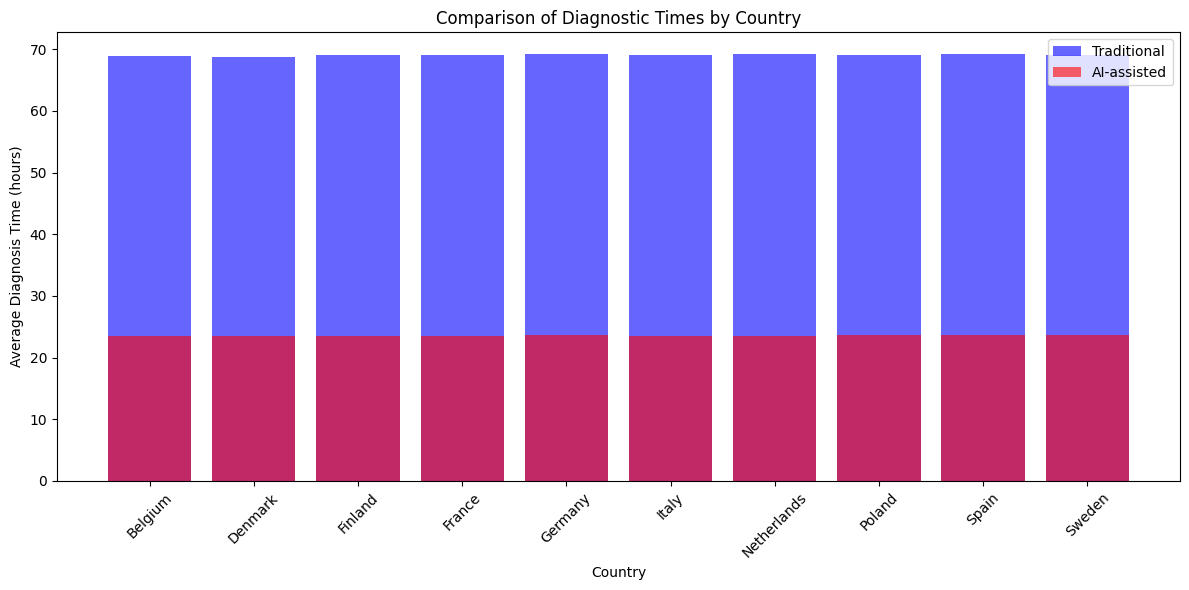

In [6]:
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('complete_cancer_detection_dataset.csv')

# Analyze seasonal variations from 'country' patterns
seasonal_pattern = df.groupby('country')[['traditional_diagnosis_time', 'ai_diagnosis_time']].mean()
print("Diagnostic times by country:")
print(seasonal_pattern)

# Create a visualization of traditional vs AI diagnosis times by country
plt.figure(figsize=(12, 6))
plt.bar(seasonal_pattern.index, seasonal_pattern['traditional_diagnosis_time'], color='blue', alpha=0.6, label='Traditional')
plt.bar(seasonal_pattern.index, seasonal_pattern['ai_diagnosis_time'], color='red', alpha=0.6, label='AI-assisted')
plt.xlabel('Country')
plt.ylabel('Average Diagnosis Time (hours)')
plt.title('Comparison of Diagnostic Times by Country')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Outlier Detection & Handling -**

Number of outliers in traditional diagnosis time: 240
Number of outliers in AI diagnosis time: 66


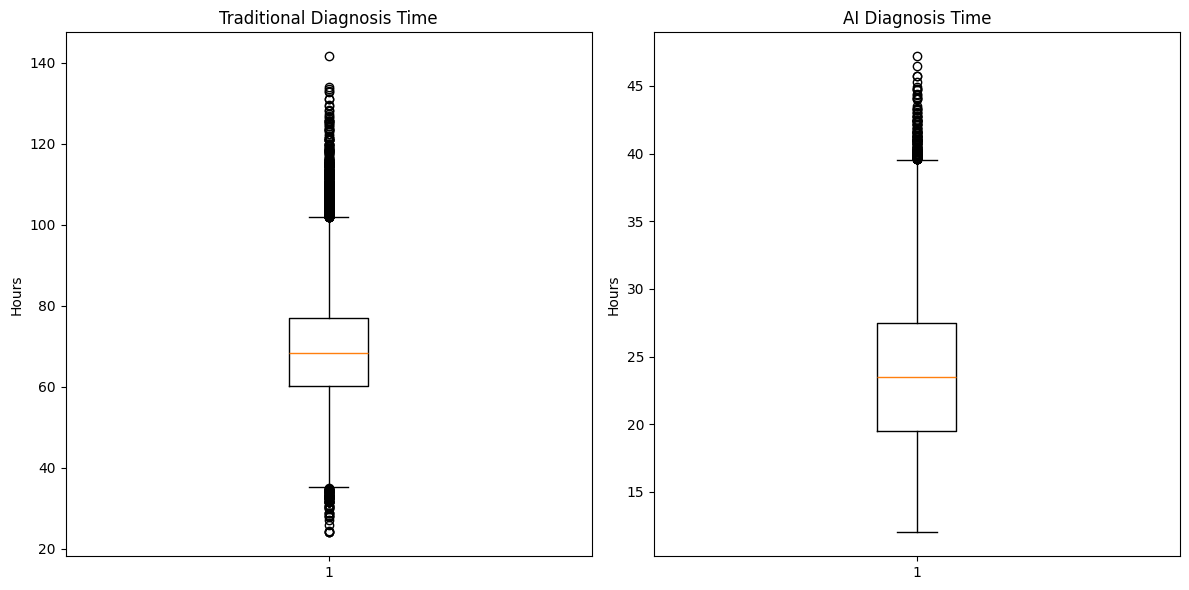


Outliers by hospital tier:
col_0          count
hospital_tier       
Primary           59
Secondary         88
Tertiary          53
University        40


In [7]:
# Calculate Z-scores for numerical columns to identify outliers
for col in ['traditional_diagnosis_time', 'ai_diagnosis_time', 'traditional_total_cost', 'ai_total_cost']:
    col_zscore = f"{col}_zscore"
    df[col_zscore] = (df[col] - df[col].mean()) / df[col].std()

# Identify outliers (Z-score > 3)
outliers_traditional = df[abs(df['traditional_diagnosis_time_zscore']) > 3]
outliers_ai = df[abs(df['ai_diagnosis_time_zscore']) > 3]

print(f"Number of outliers in traditional diagnosis time: {len(outliers_traditional)}")
print(f"Number of outliers in AI diagnosis time: {len(outliers_ai)}")

# Visualize the outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['traditional_diagnosis_time'])
plt.title('Traditional Diagnosis Time')
plt.ylabel('Hours')

plt.subplot(1, 2, 2)
plt.boxplot(df['ai_diagnosis_time'])
plt.title('AI Diagnosis Time')
plt.ylabel('Hours')

plt.tight_layout()
plt.show()

# Analyze where outliers occur by hospital tier
outlier_by_tier = pd.crosstab(
    df[abs(df['traditional_diagnosis_time_zscore']) > 3]['hospital_tier'],
    columns='count'
)
print("\nOutliers by hospital tier:")
print(outlier_by_tier)

#### **3. Advanced Categorical Analysis -**

Efficiency improvement distribution by hospital tier (%):
efficiency_improvement_cat  Negative    Low  Medium   High
hospital_tier                                             
Primary                         7.62  49.52   39.46   3.40
Secondary                       4.37  40.26   48.69   6.68
Tertiary                        2.51  31.78   54.81  10.90
University                      1.39  25.29   58.32  15.00

Technology readiness scores by country:
              mean  median   min    max   std
country                                      
Denmark      92.09    92.1  82.5  100.0  3.00
Sweden       89.96    89.9  79.7  100.0  3.05
Netherlands  88.10    88.0  73.5  100.0  4.01
Finland      87.94    87.9  73.8  100.0  4.01
Germany      85.00    84.9  64.3  100.0  5.08
Belgium      82.02    82.0  65.0   98.1  4.93
France       79.88    79.9  59.8  100.0  5.89
Spain        78.00    78.0  51.0  100.0  6.83
Italy        75.10    75.1  36.8  100.0  8.22
Poland       70.16    70.2  34.3  100.0  

C:\Users\Layanika.V.S\AppData\Local\Temp\ipykernel_27988\3503481369.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tech_by_country.index, y=tech_by_country['mean'], palette='viridis')


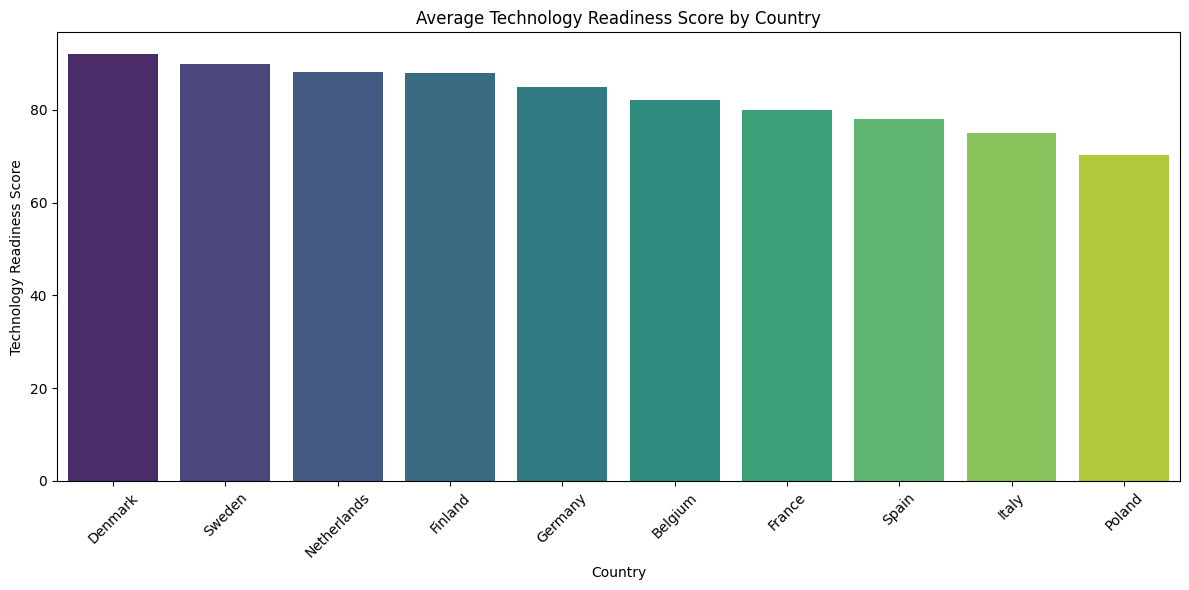

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to import seaborn
from scipy import stats

# Load the dataset
df = pd.read_csv('complete_cancer_detection_dataset.csv')

# Cross-tabulation of hospital tier vs. efficiency improvement
df['efficiency_improvement_cat'] = pd.cut(
    df['efficiency_improvement'], 
    bins=[-5, 0, 2, 4, 8], 
    labels=['Negative', 'Low', 'Medium', 'High']
)

tier_efficiency = pd.crosstab(
    df['hospital_tier'], 
    df['efficiency_improvement_cat'],
    normalize='index'
) * 100

print("Efficiency improvement distribution by hospital tier (%):")
print(tier_efficiency.round(2))

# Technology readiness by country
tech_by_country = df.groupby('country')['tech_readiness_score'].agg(['mean', 'median', 'min', 'max', 'std']).sort_values('mean', ascending=False)
print("\nTechnology readiness scores by country:")
print(tech_by_country.round(2))

# Visualize technology readiness by country
plt.figure(figsize=(12, 6))
sns.barplot(x=tech_by_country.index, y=tech_by_country['mean'], palette='viridis')
plt.title('Average Technology Readiness Score by Country')
plt.xlabel('Country')
plt.ylabel('Technology Readiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **4. Correlation Heatmap -**

Strong correlations (|r| > 0.5):
ai_survival_probability & traditional_survival_probability: 0.97
time_saved_percentage & ai_diagnosis_time: -0.74
time_saved_percentage & traditional_diagnosis_time: 0.55


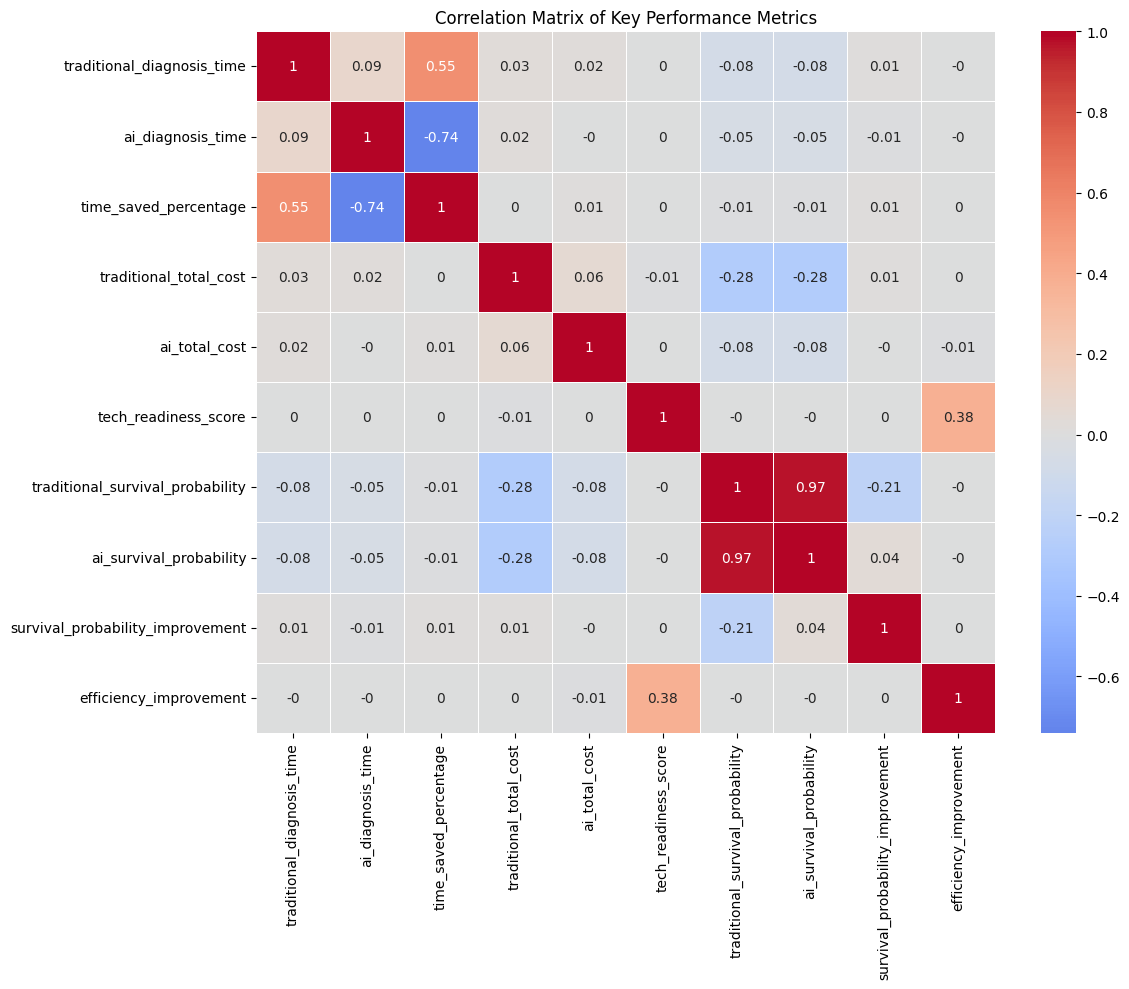

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to import seaborn
from scipy import stats

# Load the dataset
df = pd.read_csv('complete_cancer_detection_dataset.csv')

# Create correlation matrix with focus on relevant variables
focus_vars = [
    'traditional_diagnosis_time', 'ai_diagnosis_time', 'time_saved_percentage',
    'traditional_total_cost', 'ai_total_cost', 'tech_readiness_score',
    'traditional_survival_probability', 'ai_survival_probability',
    'survival_probability_improvement', 'efficiency_improvement'
]

corr_matrix = df[focus_vars].corr().round(2)

# Identify strong correlations
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  # Threshold for strong correlation
            strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Strong correlations (|r| > 0.5):")
for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} & {var2}: {corr:.2f}")

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Key Performance Metrics')
plt.tight_layout()
plt.show()

#### **5. Geographic Pattern Analysis -**

In [10]:
# Group by country and calculate key metrics
country_analysis = df.groupby('country').agg({
    'tech_readiness_score': 'mean',
    'time_saved_percentage': 'mean',
    'traditional_diagnosis_time': 'mean',
    'ai_diagnosis_time': 'mean',
    'traditional_total_cost': 'mean',
    'ai_total_cost': 'mean',
    'survival_probability_improvement': 'mean',
    'efficiency_improvement': 'mean'
}).round(2)

# Calculate additional derived metrics
country_analysis['time_reduction_hours'] = (country_analysis['traditional_diagnosis_time'] - 
                                           country_analysis['ai_diagnosis_time']).round(2)
country_analysis['cost_savings'] = (country_analysis['traditional_total_cost'] - 
                                   country_analysis['ai_total_cost']).round(2)

# Sort by technology readiness
country_analysis_sorted = country_analysis.sort_values('tech_readiness_score', ascending=False)
print("Country performance metrics (sorted by technology readiness):")
print(country_analysis_sorted)

# Efficiency improvement by region
hospital_tier_analysis = df.groupby('hospital_tier').agg({
    'tech_readiness_score': 'mean',
    'time_saved_percentage': 'mean',
    'efficiency_improvement': 'mean',
    'survival_probability_improvement': 'mean'
}).round(2)

print("\nPerformance metrics by hospital tier:")
print(hospital_tier_analysis)

Country performance metrics (sorted by technology readiness):
             tech_readiness_score  time_saved_percentage  \
country                                                    
Denmark                     92.09                  64.51   
Sweden                      89.96                  64.55   
Netherlands                 88.10                  64.82   
Finland                     87.94                  64.72   
Germany                     85.00                  64.65   
Belgium                     82.02                  64.68   
France                      79.88                  64.87   
Spain                       78.00                  64.72   
Italy                       75.10                  64.64   
Poland                      70.16                  64.44   

             traditional_diagnosis_time  ai_diagnosis_time  \
country                                                      
Denmark                           68.68              23.58   
Sweden                         

#### **6. Feature Binning -**

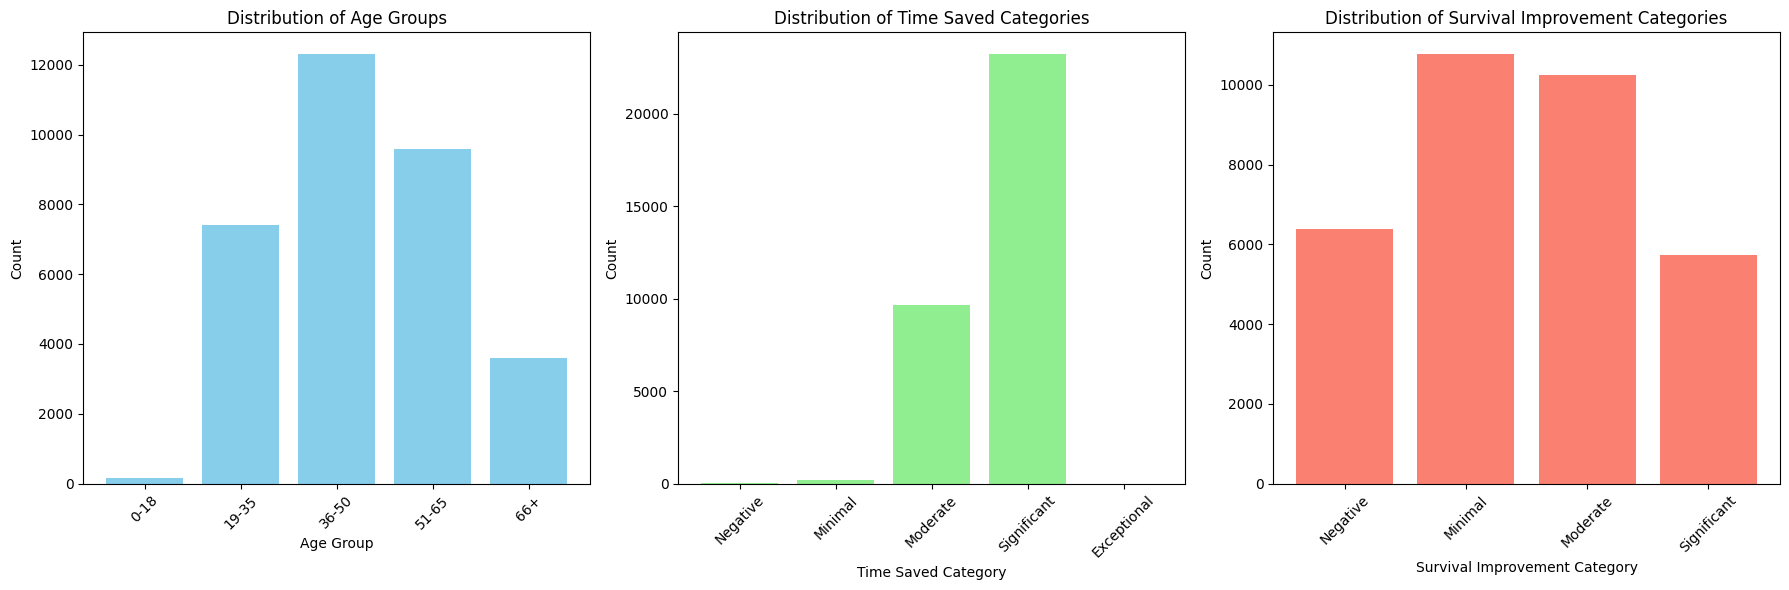

Percentage of cases in each time saved category by age group:
time_saved_category  Negative  Minimal  Moderate  Significant  Exceptional
age_group                                                                 
0-18                     0.00     2.01     24.16        73.83         0.00
19-35                    0.03     0.58     29.49        69.91         0.00
36-50                    0.03     0.59     28.74        70.62         0.01
51-65                    0.05     0.77     29.44        69.73         0.00
66+                      0.00     0.58     29.25        70.17         0.00


In [11]:
# Age binning
df['age_group'] = pd.cut(
    df['age_approx'], 
    bins=[0, 18, 35, 50, 65, 100], 
    labels=['0-18', '19-35', '36-50', '51-65', '66+']
)

# Time saved binning
df['time_saved_category'] = pd.cut(
    df['time_saved_percentage'], 
    bins=[-60, 0, 30, 60, 90, 100], 
    labels=['Negative', 'Minimal', 'Moderate', 'Significant', 'Exceptional']
)

# Survival improvement binning
df['survival_improvement_category'] = pd.cut(
    df['survival_probability_improvement'],
    bins=[-5, 0, 1, 2, 6],
    labels=['Negative', 'Minimal', 'Moderate', 'Significant']
)

# Visualize the distribution of each binned variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age groups
age_counts = df['age_group'].value_counts().sort_index()
axes[0].bar(age_counts.index, age_counts.values, color='skyblue')
axes[0].set_title('Distribution of Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Time saved categories
time_counts = df['time_saved_category'].value_counts().sort_index()
axes[1].bar(time_counts.index, time_counts.values, color='lightgreen')
axes[1].set_title('Distribution of Time Saved Categories')
axes[1].set_xlabel('Time Saved Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Survival improvement categories
surv_counts = df['survival_improvement_category'].value_counts().sort_index()
axes[2].bar(surv_counts.index, surv_counts.values, color='salmon')
axes[2].set_title('Distribution of Survival Improvement Categories')
axes[2].set_xlabel('Survival Improvement Category')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cross-tabulation of age group vs. time saved category
age_time_tab = pd.crosstab(
    df['age_group'], 
    df['time_saved_category'],
    normalize='index'
) * 100

print("Percentage of cases in each time saved category by age group:")
print(age_time_tab.round(2))